<a href="https://colab.research.google.com/github/Shrishti18/Text-Summarization/blob/main/Pegasus%2CT5%2CBART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project demonstrates how T5, Pegasus and Bart transformers with HuggingFace for text summarization applied on a news dataset.**


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
news = pd.read_excel("Inshorts Cleaned Data.xlsx", sheet_name='Sheet1')
news.head()

,Headline,Short,Source,Time,Publish Date
0,4 ex-bank officials booked for cheating bank o...,The CBI on Saturday booked four former officia...,The New Indian Express,09:25:00,2017-03-26
1,Supreme Court to go paperless in 6 months: CJI,Chief Justice JS Khehar has said the Supreme C...,Outlook,22:18:00,2017-03-25
2,"At least 3 killed, 30 injured in blast in Sylh...","At least three people were killed, including a...",Hindustan Times,23:39:00,2017-03-25
3,Why has Reliance been barred from trading in f...,Mukesh Ambani-led Reliance Industries (RIL) wa...,Livemint,23:08:00,2017-03-25
4,Was stopped from entering my own studio at Tim...,TV news anchor Arnab Goswami has said he was t...,YouTube,23:24:00,2017-03-25


In [5]:
news.drop(['Source ', 'Time ', 'Publish Date'], axis=1, inplace=True)


In [6]:
news.isnull().sum()


Headline    0
Short       0
dtype: int64

The **transformers** package, developed by Hugging Face, provides a wide range of pre-trained models for various NLP tasks, such as BERT, GPT-2, and T5.


The sentencepiece package is a library for subword text encoding, which is used to represent words in a vocabulary as a sequence of subword units. This technique is commonly used in NLP tasks to handle out-of-vocabulary (OOV) words and improve the performance of models.
```
# This is formatted as code
```



In [7]:
!pip install transformers sentencepiece


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.5 MB/s eta 0:00:00


These lines load the Pegasus model and tokenizer from the pre-trained weights stored on the Hugging Face model hub. The tokenizer is used to preprocess input text so that it can be fed into the model. The model is the pre-trained neural network that is used to generate summaries.



**pipeline("summarization", model=model, tokenizer=tokenizer, framework="tf",device=0)** method creates a pipeline object for text *summarization* task. The *model* and *tokenizer *are the pre-trained summarization model and tokenizer that we want to use, and framework and device specify the backend framework and the device to run the model on, respectively. Once the pipeline is created, you can use it to summarize input texts using the summarizer1(text) method.


In [8]:
# Pegasus in TensorFlow
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("google/pegasus-xsum")
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-xsum")
summarizer1 = pipeline("summarization", model=model, tokenizer=tokenizer, framework="tf",device=0)


In [9]:
# reducing the dataset for faster process
news=news.sample(n=20)
news.reset_index(inplace = True,drop = True)
news.head()

,Headline,Short
0,Coffee counters liver damage caused by alcohol,A review of nine existing studies revealed tha...
1,PV Sindhu eliminated in Singapore Open 2016,Indian ace shuttler PV Sindhu was eliminated f...
2,Apple files patent for autocorrect-based system,Apple has filed a patent for a system that wou...
3,Akhilesh will learn with time: Shivpal Singh,"Samajwadi Party leader Shivpal Singh Yadav, wh..."
4,World&#39;s oldest hotel is running since 705 AD,Hotel &#39;Nisiyama Onsen Keiunkan&#39; in Jap...


In [10]:
l = []
for i in range(len(news['Short'])):
    l.append(summarizer1(news['Short'][i], min_length=10, max_length=30))
news.loc[:,'Pegasus'] = l
news.head()

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1070: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


,Headline,Short,Pegasus
0,Coffee counters liver damage caused by alcohol,A review of nine existing studies revealed tha...,[{'summary_text': 'Drinking four cups of coffe...
1,PV Sindhu eliminated in Singapore Open 2016,Indian ace shuttler PV Sindhu was eliminated f...,[{'summary_text': 'Indian shuttler PV Sindhu w...
2,Apple files patent for autocorrect-based system,Apple has filed a patent for a system that wou...,[{'summary_text': 'The next version of Apple's...
3,Akhilesh will learn with time: Shivpal Singh,"Samajwadi Party leader Shivpal Singh Yadav, wh...",[{'summary_text': 'Samajwadi Party leader Shiv...
4,World&#39;s oldest hotel is running since 705 AD,Hotel &#39;Nisiyama Onsen Keiunkan&#39; in Jap...,[{'summary_text': 'The oldest hotel in the wor...


In [11]:
news['Short'][1]

'Indian ace shuttler PV Sindhu was eliminated from the 2016 Singapore Open after she lost her second round match to China&#39;s He Bingjiao 21-11, 14-21, 14-21. Indian men&#39;s doubles duo of Pranaav Jerry Chopra and Akshay Dewalkar also lost 12-21, 12-21 in straight games to Indonesian pair, Mohammad Ahsan and Hendra Setiawan.'

In [12]:
news['Headline'][1]

'PV Sindhu eliminated in Singapore Open 2016'

In [13]:
news['Pegasus'][1]

[{'summary_text': 'Indian shuttler PV Sindhu was eliminated from the 2016 Singapore Open after she lost her second round match to Chinas Hejia Bingo 21-11'}]

In [14]:
# T-5 in TensorFlow
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
summarizer2 = pipeline("summarization", model=model, tokenizer=tokenizer, framework="tf",device=0)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [15]:
l = []
for i in range(len(news['Short'])):
    l.append(summarizer2(news['Short'][i], min_length=10, max_length=30))
news.loc[:,'T5'] = l
news.head()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1070: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


,Headline,Short,Pegasus,T5
0,Coffee counters liver damage caused by alcohol,A review of nine existing studies revealed tha...,[{'summary_text': 'Drinking four cups of coffe...,[{'summary_text': 'studies take in more than 4...
1,PV Sindhu eliminated in Singapore Open 2016,Indian ace shuttler PV Sindhu was eliminated f...,[{'summary_text': 'Indian shuttler PV Sindhu w...,[{'summary_text': 'PV Sindhu is eliminated fro...
2,Apple files patent for autocorrect-based system,Apple has filed a patent for a system that wou...,[{'summary_text': 'The next version of Apple's...,[{'summary_text': 'apple has filed a patent fo...
3,Akhilesh will learn with time: Shivpal Singh,"Samajwadi Party leader Shivpal Singh Yadav, wh...",[{'summary_text': 'Samajwadi Party leader Shiv...,[{'summary_text': 'Shivpal Singh Yadav said th...
4,World&#39;s oldest hotel is running since 705 AD,Hotel &#39;Nisiyama Onsen Keiunkan&#39; in Jap...,[{'summary_text': 'The oldest hotel in the wor...,[{'summary_text': 'hotel &#39;Nisiyama Onsen K...


In [16]:
news['Short'][1]

'Indian ace shuttler PV Sindhu was eliminated from the 2016 Singapore Open after she lost her second round match to China&#39;s He Bingjiao 21-11, 14-21, 14-21. Indian men&#39;s doubles duo of Pranaav Jerry Chopra and Akshay Dewalkar also lost 12-21, 12-21 in straight games to Indonesian pair, Mohammad Ahsan and Hendra Setiawan.'

In [17]:
news['Headline'][1]

'PV Sindhu eliminated in Singapore Open 2016'

In [18]:
news['T5'][1]

[{'summary_text': "PV Sindhu is eliminated from the 2016 Singapore Open . she lost her second round match to china's He Bingjia"}]

In [19]:
# BART in PyTorch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")
summarizer3 = pipeline("summarization", model=model, tokenizer=tokenizer, min_length=5, max_length=30, device=0)


In [20]:
l = []
for i in range(len(news['Short'])):
    l.append(summarizer3(news['Short'][i], min_length=10, max_length=30))
news.loc[:,'BART'] = l
news.head()

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1070: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


,Headline,Short,Pegasus,T5,BART
0,Coffee counters liver damage caused by alcohol,A review of nine existing studies revealed tha...,[{'summary_text': 'Drinking four cups of coffe...,[{'summary_text': 'studies take in more than 4...,[{'summary_text': 'Four extra cups of coffee e...
1,PV Sindhu eliminated in Singapore Open 2016,Indian ace shuttler PV Sindhu was eliminated f...,[{'summary_text': 'Indian shuttler PV Sindhu w...,[{'summary_text': 'PV Sindhu is eliminated fro...,[{'summary_text': 'Sindhu lost her second roun...
2,Apple files patent for autocorrect-based system,Apple has filed a patent for a system that wou...,[{'summary_text': 'The next version of Apple's...,[{'summary_text': 'apple has filed a patent fo...,[{'summary_text': 'Apple has filed a patent fo...
3,Akhilesh will learn with time: Shivpal Singh,"Samajwadi Party leader Shivpal Singh Yadav, wh...",[{'summary_text': 'Samajwadi Party leader Shiv...,[{'summary_text': 'Shivpal Singh Yadav said th...,[{'summary_text': 'Shivpal Singh Yadav had ear...
4,World&#39;s oldest hotel is running since 705 AD,Hotel &#39;Nisiyama Onsen Keiunkan&#39; in Jap...,[{'summary_text': 'The oldest hotel in the wor...,[{'summary_text': 'hotel &#39;Nisiyama Onsen K...,[{'summary_text': 'Nisiyama Onsen Keiunkan in ...


In [21]:
news['Short'][1]

'Indian ace shuttler PV Sindhu was eliminated from the 2016 Singapore Open after she lost her second round match to China&#39;s He Bingjiao 21-11, 14-21, 14-21. Indian men&#39;s doubles duo of Pranaav Jerry Chopra and Akshay Dewalkar also lost 12-21, 12-21 in straight games to Indonesian pair, Mohammad Ahsan and Hendra Setiawan.'

In [22]:
news['Headline'][1]

'PV Sindhu eliminated in Singapore Open 2016'

In [23]:
news['BART'][1]

[{'summary_text': 'Sindhu lost her second round match to China&#39;s He Bingjiao 21-11, 14-21,'}]

In [24]:
news

,Headline,Short,Pegasus,T5,BART
0,Coffee counters liver damage caused by alcohol,A review of nine existing studies revealed tha...,[{'summary_text': 'Drinking four cups of coffe...,[{'summary_text': 'studies take in more than 4...,[{'summary_text': 'Four extra cups of coffee e...
1,PV Sindhu eliminated in Singapore Open 2016,Indian ace shuttler PV Sindhu was eliminated f...,[{'summary_text': 'Indian shuttler PV Sindhu w...,[{'summary_text': 'PV Sindhu is eliminated fro...,[{'summary_text': 'Sindhu lost her second roun...
2,Apple files patent for autocorrect-based system,Apple has filed a patent for a system that wou...,[{'summary_text': 'The next version of Apple's...,[{'summary_text': 'apple has filed a patent fo...,[{'summary_text': 'Apple has filed a patent fo...
3,Akhilesh will learn with time: Shivpal Singh,"Samajwadi Party leader Shivpal Singh Yadav, wh...",[{'summary_text': 'Samajwadi Party leader Shiv...,[{'summary_text': 'Shivpal Singh Yadav said th...,[{'summary_text': 'Shivpal Singh Yadav had ear...
4,World&#39;s oldest hotel is running since 705 AD,Hotel &#39;Nisiyama Onsen Keiunkan&#39; in Jap...,[{'summary_text': 'The oldest hotel in the wor...,[{'summary_text': 'hotel &#39;Nisiyama Onsen K...,[{'summary_text': 'Nisiyama Onsen Keiunkan in ...
5,Paralympic medalists to be recommended for Pad...,The Sports Ministry will recommend India&#39;s...,"[{'summary_text': 'The Indian Paralympic team,...",[{'summary_text': 'India&#39;s 19-member conti...,[{'summary_text': 'The Sports Ministry will re...
6,Twitter reacts to Salman&#39;s removal as Thum...,Reacting to Salman Khan being dropped as the b...,[{'summary_text': 'Social media users have bee...,[{'summary_text': '&#34;#ThumsUp punishes Salm...,[{'summary_text': 'Twitter users react to Salm...
7,Messi&#39;s winner helps Barcelona secure 2-1 win,Barcelona clinched a hard-fought 2-1 win over ...,[{'summary_text': 'Watch highlights of Barcelo...,[{'summary_text': 'barcelona beat malaga 2-1 t...,[{'summary_text': 'Barcelona beat Malaga 2-1 t...
8,Prime accused in Nabha jailbreak case arrested...,The Indore Police on Tuesday arrested Kulpreet...,[{'summary_text': 'Police in Madhya Pradesh ha...,[{'summary_text': '10 armed men had freed KLF ...,[{'summary_text': 'Kulpreet Singh Deol is prim...
9,Former US Prez George HW Bush hospitalised,Former US President George HW Bush has been ho...,[{'summary_text': 'The former US President Geo...,[{'summary_text': 'the 92-year-old former pres...,[{'summary_text': 'The 92-year-old former pres...


In [25]:
!pip install datasets rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.8 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=68ad5c26da00250f061eb5486755318b5ea7de9bd626a86573525d4f59f51ea4
  Stored in directory: /root/.cache/pip/wheels/5f/dd/8

In [26]:

from datasets import load_metric
rouge_metric = load_metric('rouge')


<ipython-input-26-64659b435cef>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric('rouge')


In [27]:
records = []


ROUGE value for one summarization *news['Headline'][1]*

In [28]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = news['Headline'][1]

rouge_metric.add(prediction = news['Pegasus'][1], reference = reference )
score = rouge_metric.compute()
rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
print('rouge_dict ', rouge_dict )

rouge_dict  {'rouge1': 0.36363636363636365, 'rouge2': 0.12903225806451613, 'rougeL': 0.30303030303030304, 'rougeLsum': 0.30303030303030304}


ROUGE value for all 20 summarization

In [29]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

references = news['Headline'].tolist()
predictions = news['Pegasus'].tolist()

rouge_scores = {rn: 0 for rn in rouge_names}

for i in range(len(references)):
    reference = references[i]
    prediction = predictions[i]

    rouge_metric.add(prediction=prediction, reference=reference)
    score = rouge_metric.compute()

    for rn in rouge_names:
        rouge_scores[rn] += score[rn].mid.fmeasure

rouge_avg = {rn: rouge_scores[rn] / len(references) for rn in rouge_names}
rouge_dict= dict(rouge_avg)
print('rouge_avg:', rouge_avg)
records.append(rouge_dict)


rouge_avg: {'rouge1': 0.27937465499746716, 'rouge2': 0.06458823935805712, 'rougeL': 0.24279739232933997, 'rougeLsum': 0.24279739232933997}


In [30]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = news['Headline'][1]


rouge_metric.add(prediction = news['T5'][1], reference = reference )
score = rouge_metric.compute()
rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
print('rouge_dict ', rouge_dict )

rouge_dict  {'rouge1': 0.41379310344827586, 'rouge2': 0.14814814814814814, 'rougeL': 0.3448275862068965, 'rougeLsum': 0.3448275862068965}


In [31]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

references = news['Headline'].tolist()
predictions = news['T5'].tolist()

rouge_scores = {rn: 0 for rn in rouge_names}

for i in range(len(references)):
    reference = references[i]
    prediction = predictions[i]

    rouge_metric.add(prediction=prediction, reference=reference)
    score = rouge_metric.compute()

    for rn in rouge_names:
        rouge_scores[rn] += score[rn].mid.fmeasure

rouge_avg = {rn: rouge_scores[rn] / len(references) for rn in rouge_names}
rouge_dict = dict(rouge_avg)
print('rouge_avg:', rouge_avg)
records.append(rouge_dict)



rouge_avg: {'rouge1': 0.25073181703651964, 'rouge2': 0.06365922202462802, 'rougeL': 0.19802210855563263, 'rougeLsum': 0.19802210855563263}


In [32]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = news['Headline'][1]


rouge_metric.add(prediction = news['BART'][1], reference = reference )
score = rouge_metric.compute()
rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
print('rouge_dict ', rouge_dict )

rouge_dict  {'rouge1': 0.08, 'rouge2': 0.0, 'rougeL': 0.08, 'rougeLsum': 0.08}


In [33]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

references = news['Headline'].tolist()
predictions = news['BART'].tolist()

rouge_scores = {rn: 0 for rn in rouge_names}

for i in range(len(references)):
    reference = references[i]
    prediction = predictions[i]

    rouge_metric.add(prediction=prediction, reference=reference)
    score = rouge_metric.compute()

    for rn in rouge_names:
        rouge_scores[rn] += score[rn].mid.fmeasure

rouge_avg = {rn: rouge_scores[rn] / len(references) for rn in rouge_names}
rouge_dict=dict(rouge_avg)
print('rouge_avg:', rouge_avg)
records.append(rouge_dict)



rouge_avg: {'rouge1': 0.24982224972325082, 'rouge2': 0.07354181483658681, 'rougeL': 0.22490001470020937, 'rougeLsum': 0.22490001470020937}


In [34]:
rouge_scores=pd.DataFrame.from_records(records )

new_index = ['Pegasus', 'T5', 'Bart']
rouge_scores = rouge_scores.set_index(pd.Index(new_index))

rouge_scores

,rouge1,rouge2,rougeL,rougeLsum
Pegasus,0.279375,0.064588,0.242797,0.242797
T5,0.250732,0.063659,0.198022,0.198022
Bart,0.249822,0.073542,0.224900,0.224900


In [35]:
# For this Dataset it can be clearly seen that Pegasus is not a perfect match, BARTand T5 has better Rouge value.

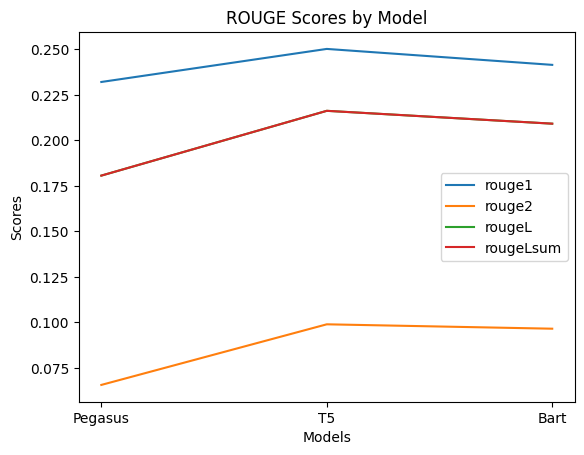

In [36]:
import matplotlib.pyplot as plt

models = ['Pegasus', 'T5', 'Bart']
rouge1 = [0.232123, 0.250286, 0.241525]
rouge2 = [0.065643, 0.098951, 0.096538]
rougeL = [0.180665, 0.216269, 0.209207]
rougeLsum = [0.180665, 0.216269, 0.209207]

# plot the data
fig, ax = plt.subplots()
ax.plot(models, rouge1, label='rouge1')
ax.plot(models, rouge2, label='rouge2')
ax.plot(models, rougeL, label='rougeL')
ax.plot(models, rougeLsum, label='rougeLsum')

# add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('ROUGE Scores by Model')
ax.legend()

plt.show()

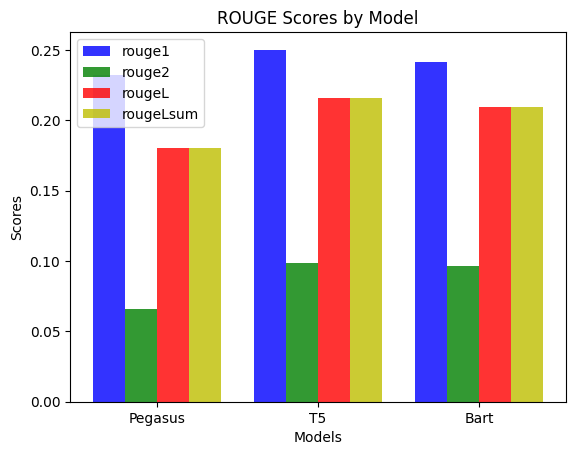

In [37]:
import matplotlib.pyplot as plt

models = ['Pegasus', 'T5', 'Bart']
rouge1 = [0.232123, 0.250286, 0.241525]
rouge2 = [0.065643, 0.098951, 0.096538]
rougeL = [0.180665, 0.216269, 0.209207]
rougeLsum = [0.180665, 0.216269, 0.209207]

# plot the data
fig, ax = plt.subplots()
index = range(len(models))
bar_width = 0.2
opacity = 0.8

rects1 = ax.bar(index, rouge1, bar_width, alpha=opacity, color='b', label='rouge1')
rects2 = ax.bar([i + bar_width for i in index], rouge2, bar_width, alpha=opacity, color='g', label='rouge2')
rects3 = ax.bar([i + 2*bar_width for i in index], rougeL, bar_width, alpha=opacity, color='r', label='rougeL')
rects4 = ax.bar([i + 3*bar_width for i in index], rougeLsum, bar_width, alpha=opacity, color='y', label='rougeLsum')

# add labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('ROUGE Scores by Model')
ax.set_xticks([i + 1.5*bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()